Logistic Regression 

In [4]:
import numpy as np
import pandas as pd

def data_cleaner(data):
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

In [5]:
#data imports 

#load training data
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
npf_train_raw = pd.read_csv(url)
npf_train = data_cleaner(npf_train_raw)

#create feature array and target column for training data
X_train = npf_train.iloc[:,2:]
y_train = npf_train["class2"]

#import validation data
npf_validation_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/validation.csv")
npf_validation = data_cleaner(npf_validation_raw)

#create feature array and target column for test data
X_validation = npf_validation.iloc[:,2:]
y_validation = npf_validation["class2"]

#import test data
npf_test_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/test.csv")
npf_test = data_cleaner(npf_test_raw)

#create feature array and target column for test data
X_test = npf_test.iloc[:,2:]
y_test = npf_test["class2"]

Accuracy on test set:  0.9534883720930233
Accuracy on validation set:  0.8604651162790697
Accuracy on train set:  0.9341085271317829


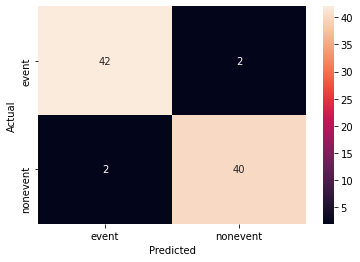

In [6]:
#logistic regression
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#normalise the X data
from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)
X_validation_norm = StandardScaler().fit_transform(X_validation)

#binary classifier with logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_norm,y_train)
y_pred_test = logistic_regression.predict(X_test_norm)
y_pred_train = logistic_regression.predict(X_train_norm)
y_pred_validation = logistic_regression.predict(X_validation_norm)

confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy on test set: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy on validation set: ',metrics.accuracy_score(y_validation, y_pred_validation))
print('Accuracy on train set: ',metrics.accuracy_score(y_train, y_pred_train))

Text(0.5, 0, 'Linear Response')

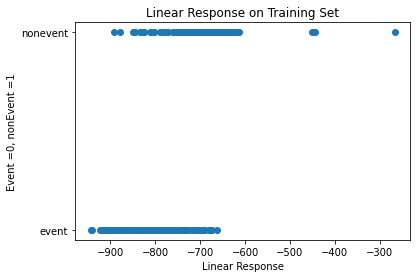

In [11]:
#Linear Reponse of training set

#extract coefs
betas = logistic_regression.coef_
beta_interr = logistic_regression.intercept_
#find linear responses for training set
beta_t_x =  X_train @ betas.T + beta_interr

#figures for linear response
fig = plt.figure()
plt.scatter(beta_t_x,y_train)
plt.title("Linear Response on Training Set")
plt.ylabel("Event =0, nonEvent =1")
plt.xlabel("Linear Response")
